# Import Libraries

In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load data

In [ ]:
file_path = 'dataset_tweet_sentiment_cellular_service_provider.csv'
df = pd.read_csv(file_path)
df.head(5)

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>


# Data Exploration & Preprocessing (EDA & Preprocessing)

## Initial Data Exploration

In [ ]:
# View general information (data types, non-null values)
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          300 non-null    int64 
 1   Sentiment   300 non-null    object
 2   Text Tweet  300 non-null    object
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
# Checking the number of missing values
print("\nMissing Values Count:")
df.isnull().sum()


Missing Values Count:


,0
Id,0
Sentiment,0
Text Tweet,0


In [ ]:
# Sentiment Distribution
print(df['Sentiment'].value_counts())

Sentiment
negative    161
positive    139
Name: count, dtype: int64


## Data Visualization

In [ ]:
# Calculate sentiment distribution
sentimen_counts = df['Sentiment'].value_counts()

/tmp/ipython-input-8-1834838938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette=['green', 'red', 'gray'])
/tmp/ipython-input-8-1834838938.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette=['green', 'red', 'gray'])


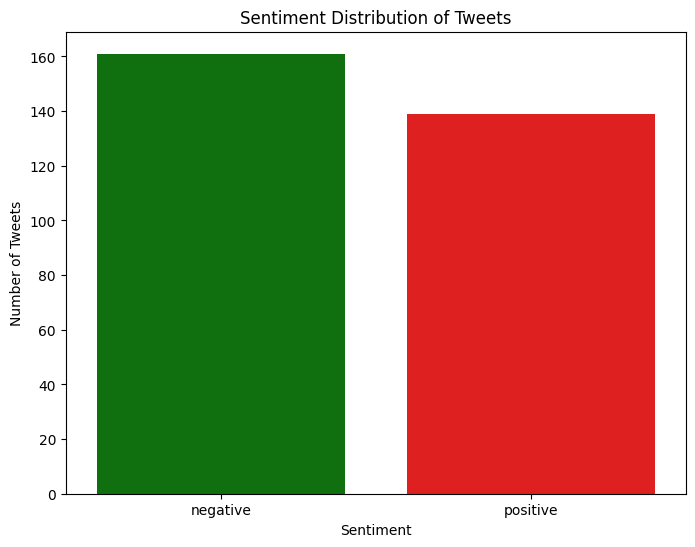

In [ ]:
# Bar Chart: Sentiment Distribution
plt.figure(figsize=(8,6))
sns.barplot(x=sentimen_counts.index, y=sentimen_counts.values, palette=['green', 'red', 'gray'])
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

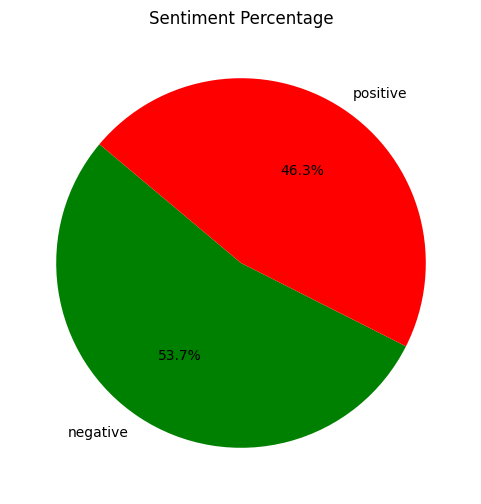

In [ ]:
# --- 2. Pie Chart: Persentase Sentimen ---
plt.figure(figsize=(6,6))
colors = ['green', 'red', 'gray']
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Sentiment Percentage")
plt.show()

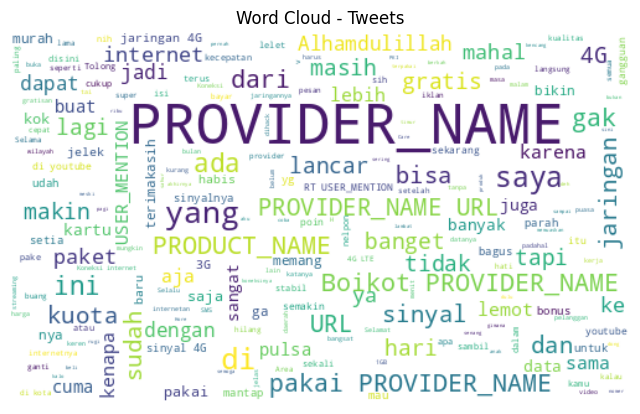

In [ ]:
# Word Cloud of all Tweets
text = " ".join(df['Text Tweet'].dropna())  # Merge all tweets,
if text:
    wordcloud = WordCloud(width=500, height=300, background_color='white').generate(text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud - Tweets")
    plt.show()

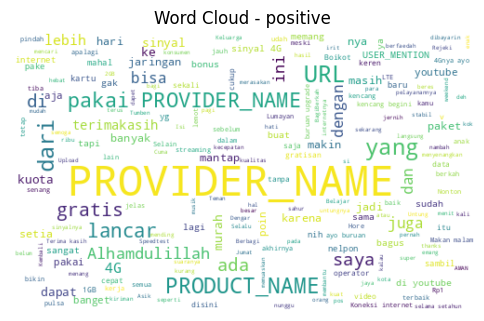

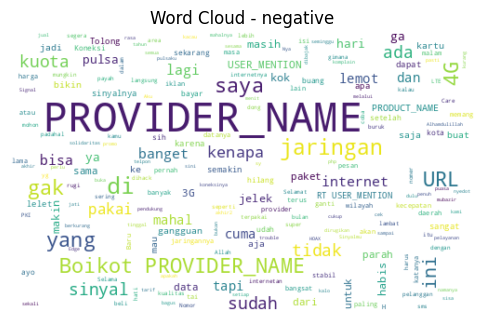

In [ ]:
# Word Cloud for each Sentiment
for sentiment in ['positive', 'negative']:
    text = " ".join(df[df['Sentiment'] == sentiment]['Text Tweet'])
    if text:
        wordcloud = WordCloud(width=500, height=300, background_color='white').generate(text)

        plt.figure(figsize=(6,4))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud - {sentiment}")
        plt.show()

## Data Cleaning and Preparation

In [ ]:
# Data Cleaning Function
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase and ensure it's a string
    text = re.sub(r'<[^>]+>', '', text)  # Remove tags like <PROVIDER_NAME>
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@[^\s]+', '', text)  # Remove mentions
    text = re.sub(r'#\S+', '', text)     # Remove the hashtag + the word
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

In [ ]:
# Apply the cleaning function
df['Cleaned_Tweet'] = df['Text Tweet'].apply(clean_text)

In [ ]:
df[['Text Tweet', 'Cleaned_Tweet']].head(10)

,Text Tweet,Cleaned_Tweet
0,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,gunakan produk bangsa sendiri
1,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...",saktinya balik lagi alhamdulillah v
2,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...,selamat pagi bisa bantu kenapa di dalam kama...
3,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...,dear akhir ini jaringan data lemot banget pad...
4,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta
5,Untuk penembakan paket dari <PRODUCT_NAME> mas...,untuk penembakan paket dari masih gangguan ya
6,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...",aku pakai paket nya udah off tapi gantinya...
7,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...,rt tak ada lagi dalam kamus perhapean saya
8,keluhan gak ditanggapi. bikin emosi aja. pulsa...,keluhan gak ditanggapi bikin emosi aja pulsaku...
9,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...,iklan kok ada pesan tersembunyi


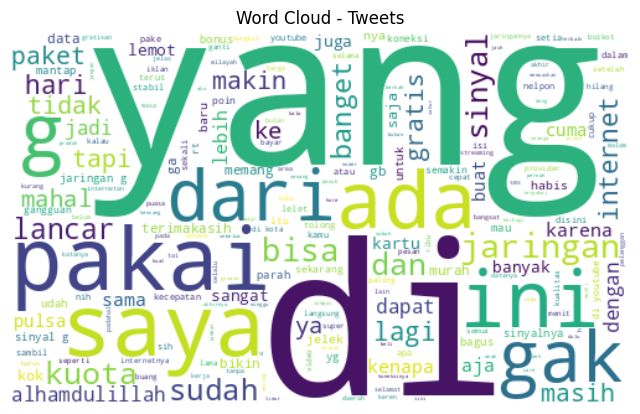

In [ ]:
# Word Cloud of all Cleaned Tweets
text = " ".join(df['Cleaned_Tweet'].dropna())  # Merge all tweets,
if text:
    wordcloud = WordCloud(width=500, height=300, background_color='white').generate(text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud - Tweets")
    plt.show()

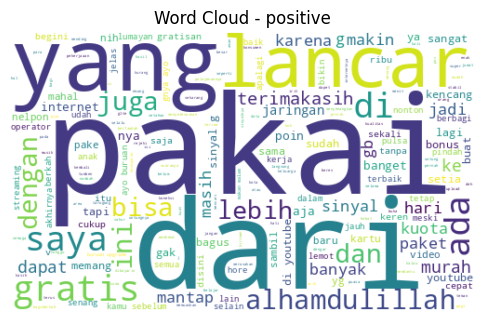

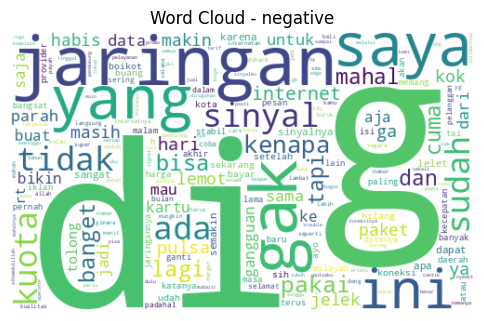

In [ ]:
# Word Cloud for each Sentiment on Cleaned Tweet
for sentiment in ['positive', 'negative']:
    text = " ".join(df[df['Sentiment'] == sentiment]['Cleaned_Tweet'])
    if text:
        wordcloud = WordCloud(width=500, height=300, background_color='white').generate(text)

        plt.figure(figsize=(6,4))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud - {sentiment}")
        plt.show()

In [ ]:
# Define features (X) and target (y)
X = df['Cleaned_Tweet']
y = df['Sentiment']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words=None)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Label Encoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Retrieve word features (vocabulary)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert sparse matrix to dense and display as DataFrame
df_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)

# Show the first few rows
df_tfidf.head()

,_jabo,acara,aceh,ada,adalah,adanya,aja,ajaib,akan,akhir,...,wkp,ya,yaa,yah,yang,yg,youtube,youtubenya,youtubetahun,youtubeyondergenflix
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.303532,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.187807,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.270392,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.236131,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.339966,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.152671,0.000000,0.0,0.0,0.0,0.0


# Modelling and Evaluation

In [ ]:
# Modelling
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train_encoded)

SVC(kernel='linear')

In [ ]:
# Model Evaluation
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred, digits=4)
cm = confusion_matrix(y_test_encoded, y_pred)

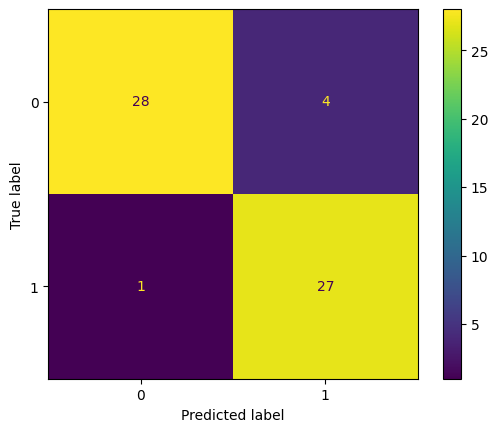

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


--- Model Evaluation ---
Accuracy: 0.9167
Classification Report:
              precision    recall  f1-score   support

           0     0.9655    0.8750    0.9180        32
           1     0.8710    0.9643    0.9153        28

    accuracy                         0.9167        60
   macro avg     0.9182    0.9196    0.9166        60
weighted avg     0.9214    0.9167    0.9167        60

